# PP2.1 - Experimento II

#### Alunos:
   - Fabrício Mady
   - Bernardo Kanekiyo
   

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics
from random import uniform

In [3]:
class Neuronio:
    
    def __init__(self):
        self.dados = np.array([])
        self.carrega_dados()
        self.pesos = np.array([
            uniform(-.100, .100),
            uniform(-1, 1),
            uniform(-.5, .5)
        ])
        
        self.teta = 0
        self.ta   = 0.1
        self.vies = -1
        self.total_de_ajustes = []
        self.epocas = 0
        self.x1 = 0
        self.x2 = 0
    
    def muda_pesos_iniciais(self,x1,x2,x3):
        self.pesos[0] = self.pesos[0]*x1
        self.pesos[1] = self.pesos[1]*x2
        self.pesos[2] = self.pesos[2]*x3

    def carrega_dados(self):
        dataset = np.fromfile('data/data2.txt')
        linhas  = len(dataset)//3
        colunas = 3
        self.dados=dataset.reshape(linhas, colunas)
    
    def mostra_grafico(self):
        fig, ax = plt.subplots()
        for i in self.dados:
            x = i[0]
            y = i[1]
            yd = int(i[2])
            if(yd >= 1):
                plt.scatter(x,y, color='r', s=8)
            else:
                plt.scatter(x,y, color='b', s=8)

        ponto1 = [0,self.x1]
        ponto2 = [self.x2,0]
        x_values = [ponto1[0], ponto2[0]]
        y_values = [ponto1[1], ponto2[1]]

        ax.plot(x_values, y_values)
        plt.show()
        
    def funcao_ativacao(self,num):
        if (num>=self.teta):
            return 1
        else:
            return 0
        
    def perceptron(self):
        numero_de_ajustes = 0
        
        for i in self.dados:
            
            entrada = np.concatenate((np.array([self.vies]), i[:2]))
            yd = int(i[2:])
            yr = round(entrada.dot(self.pesos),4)
            yr = self.funcao_ativacao(yr)
            
            numero_de_ajustes += 1
            
            self.pesos = self.ajuste_de_peso(yd, yr, entrada)
            
            if(yr != yd):
                self.total_de_ajustes.append(numero_de_ajustes)
                return False
            
        self.total_de_ajustes.append(numero_de_ajustes)
        return True

    def ajuste_de_peso(self, yd, yr, entrada):
        delta = self.ta * np.array(yd - yr).dot(entrada)
        novos_pesos = self.pesos + delta
        
        return novos_pesos
    
    def descobre_x1_x2(self):
        w = self.pesos
        
        w0_w2 = w[0]/w[2]
        w1_w2 = w[1]/w[2]

        self.x2 = w0_w2 - w1_w2 * 0
        self.x1 = w0_w2/w1_w2
    
    def treino(self):
        self.epocas = 1
        for i in range(10):
            if(self.perceptron() == False):
                self.epocas += 1
            else:
                break
            
        self.descobre_x1_x2()

        print("Total de épocas: ",self.epocas)
        print("Total de ajustes feitos nos pesos: ",sum(self.total_de_ajustes))
        print("Média de ajustes feitos nos pesos: ",sum(self.total_de_ajustes)/len(self.total_de_ajustes))
        print("Desvio padrão de ajustes feitos nos pesos: ",statistics.stdev(self.total_de_ajustes))
        
        return self.epocas, sum(self.total_de_ajustes), sum(self.total_de_ajustes)/len(self.total_de_ajustes), statistics.stdev(self.total_de_ajustes)
        
n1 = Neuronio()
n2 = Neuronio()
n3 = Neuronio()
n4 = Neuronio()
n5 = Neuronio()
n6 = Neuronio()

# Configurações diferentes: 6
{0,4, 0,1, 0,01} × {(−100, + 100),(−1, + 1),(−0,5, + 0,5)}

In [4]:
n1.muda_pesos_iniciais(0.4 ,0.1 ,0.01)
n2.muda_pesos_iniciais(0.4 ,0.01, 0.1)
n3.muda_pesos_iniciais(0.4 ,0.4 , 0.4)
n4.muda_pesos_iniciais(0.1 ,0.4 ,0.01)
n5.muda_pesos_iniciais(0.1 ,0.01, 0.4)
n6.muda_pesos_iniciais(0.1 ,0.1 , 0.1)

# Treino das configurações

In [5]:
epocas = []
total_ajustes = []
media_ajustes = []
desvio_padrao = []

x, y, z, i = n1.treino()
epocas.append(x)
total_ajustes.append(y)
media_ajustes.append(z)
desvio_padrao.append(i)

Total de épocas:  8
Total de ajustes feitos nos pesos:  1217
Média de ajustes feitos nos pesos:  152.125
Desvio padrão de ajustes feitos nos pesos:  211.85941261668248


In [6]:
x, y, z, i = n2.treino()
epocas.append(x)
total_ajustes.append(y)
media_ajustes.append(z)
desvio_padrao.append(i)

Total de épocas:  5
Total de ajustes feitos nos pesos:  1054
Média de ajustes feitos nos pesos:  210.8
Desvio padrão de ajustes feitos nos pesos:  250.60965663756852


In [7]:
x, y, z, i = n3.treino()
epocas.append(x)
total_ajustes.append(y)
media_ajustes.append(z)
desvio_padrao.append(i)

Total de épocas:  11
Total de ajustes feitos nos pesos:  734
Média de ajustes feitos nos pesos:  73.4
Desvio padrão de ajustes feitos nos pesos:  67.33366336552781


In [8]:
x, y, z, i = n4.treino()
epocas.append(x)
total_ajustes.append(y)
media_ajustes.append(z)
desvio_padrao.append(i)

Total de épocas:  11
Total de ajustes feitos nos pesos:  1226
Média de ajustes feitos nos pesos:  122.6
Desvio padrão de ajustes feitos nos pesos:  136.5594701545407


In [9]:
x, y, z, i = n5.treino()
epocas.append(x)
total_ajustes.append(y)
media_ajustes.append(z)
desvio_padrao.append(i)

Total de épocas:  11
Total de ajustes feitos nos pesos:  1083
Média de ajustes feitos nos pesos:  108.3
Desvio padrão de ajustes feitos nos pesos:  121.33795778733051


In [10]:
x, y, z, i = n6.treino()
epocas.append(x)
total_ajustes.append(y)
media_ajustes.append(z)
desvio_padrao.append(i)

Total de épocas:  10
Total de ajustes feitos nos pesos:  1529
Média de ajustes feitos nos pesos:  152.9
Desvio padrão de ajustes feitos nos pesos:  199.77679211226382


# Gráfico das configurações

Configuração 1:

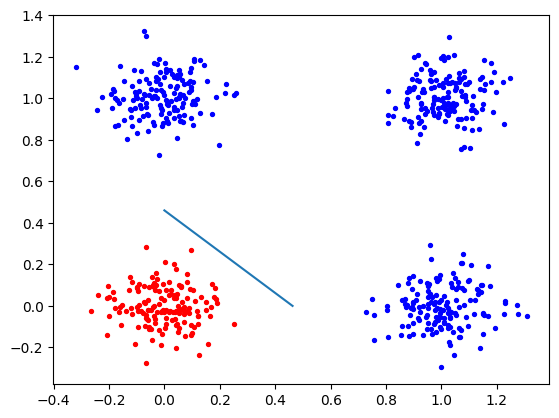

In [11]:
n1.mostra_grafico()

Configuração 2:

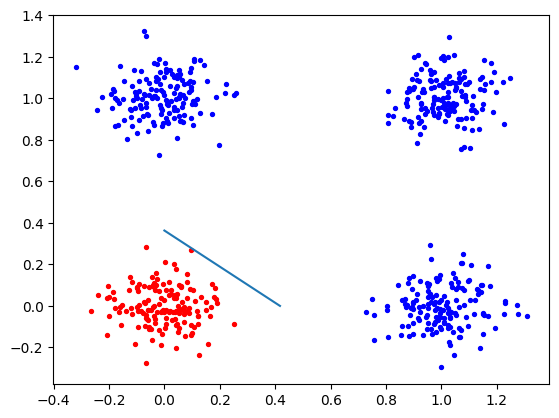

In [12]:
n2.mostra_grafico()

Configuração 3:

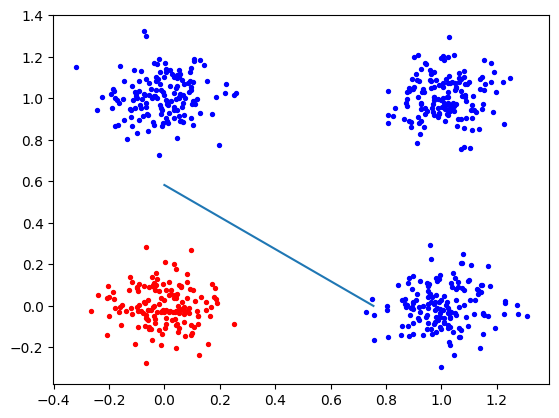

In [13]:
n3.mostra_grafico()

Configuração 4:

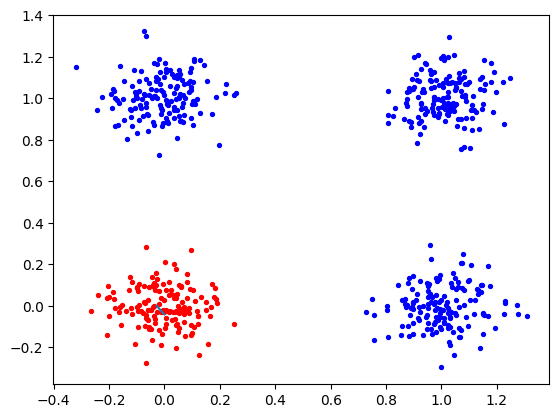

In [14]:
n4.mostra_grafico()

Configuração 5:

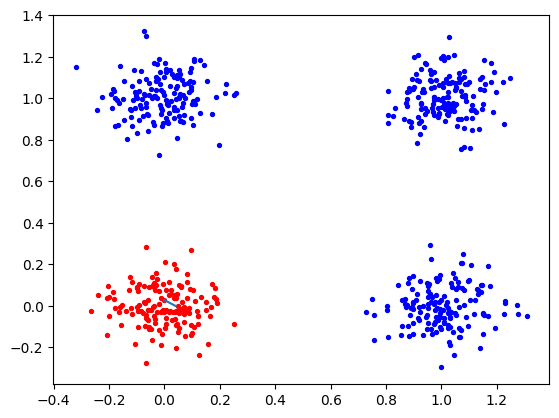

In [15]:
n5.mostra_grafico()

Configuração 6:

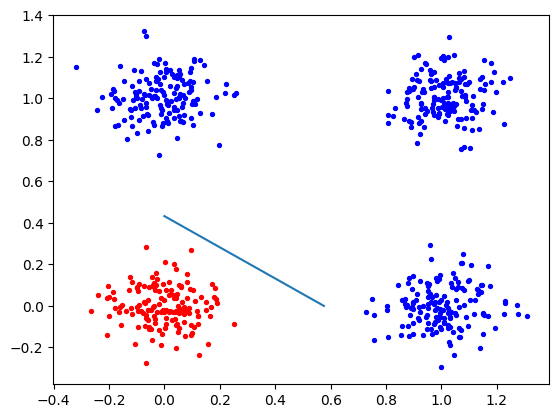

In [16]:
n6.mostra_grafico()

# Tabela com a comparação da média e desvio padrão das 6 configurações

In [19]:
from prettytable import PrettyTable
dat_dtype = {
    'names' : ('Configuração', 'Épocas', 'Total Ajustes', 'Média Ajustes', 'Desvio Padrão'),
    'formats' : ('i', 'i', 'i', 'd', 'd')}

dat = np.zeros(6, dat_dtype)

f = [1, 2, 3, 4, 5, 6]
i = 0

while i < 6:
    dat['Configuração'][i] = f[i]
    dat['Épocas'][i] = epocas[i]
    dat['Total Ajustes'][i] = total_ajustes[i]
    dat['Média Ajustes'][i] = media_ajustes[i]
    dat['Desvio Padrão'][i] = desvio_padrao[i]
    
    i+=1

x = PrettyTable(dat.dtype.names)

for row in dat:
    x.add_row(row)

print(x)

+--------------+--------+---------------+---------------+--------------------+
| Configuração | Épocas | Total Ajustes | Média Ajustes |   Desvio Padrão    |
+--------------+--------+---------------+---------------+--------------------+
|      1       |   8    |      1217     |    152.125    | 211.85941261668248 |
|      2       |   5    |      1054     |     210.8     | 250.60965663756852 |
|      3       |   11   |      734      |      73.4     | 67.33366336552781  |
|      4       |   11   |      1226     |     122.6     | 136.5594701545407  |
|      5       |   11   |      1083     |     108.3     | 121.33795778733051 |
|      6       |   10   |      1529     |     152.9     | 199.77679211226382 |
+--------------+--------+---------------+---------------+--------------------+


Olhando a tabela percebe-se que a configuração 3 possui um maior número de épocas, mas possui também o menor número de ajustes, a menor média de ajustes e o menor desvio padrão.